# Predicition (추정치 구하기)

## Contents
1. mtcars 데이터로 추정하기
2. diamonds 데이터로 캐럿에 따른 가격 예측하기
3. 예측값 신뢰구간으로 나타내기
---
## 추정치 구하기
```predict()```함수를 이용한다. 

이용법: ```predict(lm 객체)```

## 1. mtcars 데이터로 추정하기

In [2]:
# Step 1: 데이터 불러오기
DF <- mtcars

# Step 2: 데이터 구조 살펴보기
head(DF, 5)
str(DF)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


* 종속변수: mpg (연비)
* 독립변수: wt (차체무게)

In [3]:
# Step 3: 회귀모델 구하기
Lm <- lm(mpg ~ wt, data=DF)
Lm


Call:
lm(formula = mpg ~ wt, data = DF)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  


In [4]:
# Step 4: 회귀모델 검증하기
summary(Lm)


Call:
lm(formula = mpg ~ wt, data = DF)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


$R^2$값도 양호하고 회귀계수도 유의하다. 이제 ```predict()```함수를 이용해 추정치를 구해본다.

In [6]:
# Step 5: 회귀모델에 값을 넣어 추정치를 구한다.
b <- predict(Lm)
b

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
          23.282611           21.919770           24.885952           20.102650 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          18.900144           18.793255           18.205363           20.236262 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          20.450041           18.900144           18.900144           15.533127 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          17.350247           17.083024            9.226650            8.296712 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
           8.718926           25.527289           28.653805           27.478021 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          24.111004           18.472586           18.926866           16.762355 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          16.735633           26.943574           25.847957           29.198941 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
          20.343151           22.480940           18.205363           22.427495

각 자동차마다의 추정치가 나타난다. 먼저 자동차 한 개만 실제값과 추정치를 비교해보자.

In [7]:
# Step 6: 한 instance 비교
DF$mpg[1]
b[1]

[1] 21

Mazda RX4 
 23.28261

In [8]:
# Step 7: 데이터프레임에 넣어 비교
Com <- data.frame(mpg=DF$mpg, fittedMPG=b)
Com

,mpg,fittedMPG
,<dbl>,<dbl>
Mazda RX4,21.0,23.282611
Mazda RX4 Wag,21.0,21.919770
Datsun 710,22.8,24.885952
Hornet 4 Drive,21.4,20.102650
Hornet Sportabout,18.7,18.900144
Valiant,18.1,18.793255
Duster 360,14.3,18.205363
Merc 240D,24.4,20.236262
Merc 230,22.8,20.450041


대부분의 값이 비슷하므로 이제 새로운 데이터를 넣어 예측해본다.

차체무게가 6톤일 때 연비가 몇이 될지 추정해보자.

In [9]:
# Step 8 : 새로운 데이터 만들기
NewCar <- data.frame(wt=6)

# Step 9: 예측값 구하기
predict(Lm, newdata=NewCar)

1 
5.218297

## 2. diamonds 데이터로 캐럿에 따른 가격 예측하기
diamonds는 R 기본 내장 데이터셋이다 **ggplot2** library에 내장되어있다. 53940개의 다이아몬드를 조사한 자료이다.

In [6]:
# Step 1: 데이터셋 불러오기
#install.packages('ggplot2')
library(ggplot2)
DF <- diamonds

# Step 2: 구조 살펴보기
head(DF, 5)
str(DF)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


* 종속변수: 가격 (price)
* 독립변수: 캐럿 (carat)

In [1]:
# Step 3: 회귀모델 구하기
Lm <- lm(price ~ carat, data=DF)
Lm

ERROR: Error in is.data.frame(data): 객체 'DF'를 찾을 수 없습니다


In [8]:
# Step 4: 회귀모델 검증하기
summary(Lm)


Call:
lm(formula = price ~ carat, data = DF)

Residuals:
     Min       1Q   Median       3Q      Max 
-18585.3   -804.8    -18.9    537.4  12731.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2256.36      13.06  -172.8   <2e-16 ***
carat        7756.43      14.07   551.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1549 on 53938 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8493 
F-statistic: 3.041e+05 on 1 and 53938 DF,  p-value: < 2.2e-16


p-value, $R^2$ 모두 괜찮고, 회귀계수들 역시 모두 유의하다.

10, 20 캐럿일 때의 가격을 예측해보자.

In [17]:
# Step 5: 새로운 데이터 만들기
NewDiamond <- data.frame(carat=c(10,20))

# Step 6: 예측값 구하기
predict(Lm, newdata=NewDiamond)

1        2 
 75307.9 152872.2

## 3. 예측값 신뢰구간으로 나타내기

In [2]:
# Step 1: 데이터 불러오기
library(ggplot2)
DF <- diamonds

이 데이터로부터 표본을 표집해서 회귀모델을 구한다. ```sample()```함수를 이용한다.

diamonds 데이터로부터 100개의 임의 데이터를 표집한다.

In [3]:
# Step 2: 표본 만들기
Sample <- DF[sample(nrow(DF), 100),]

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



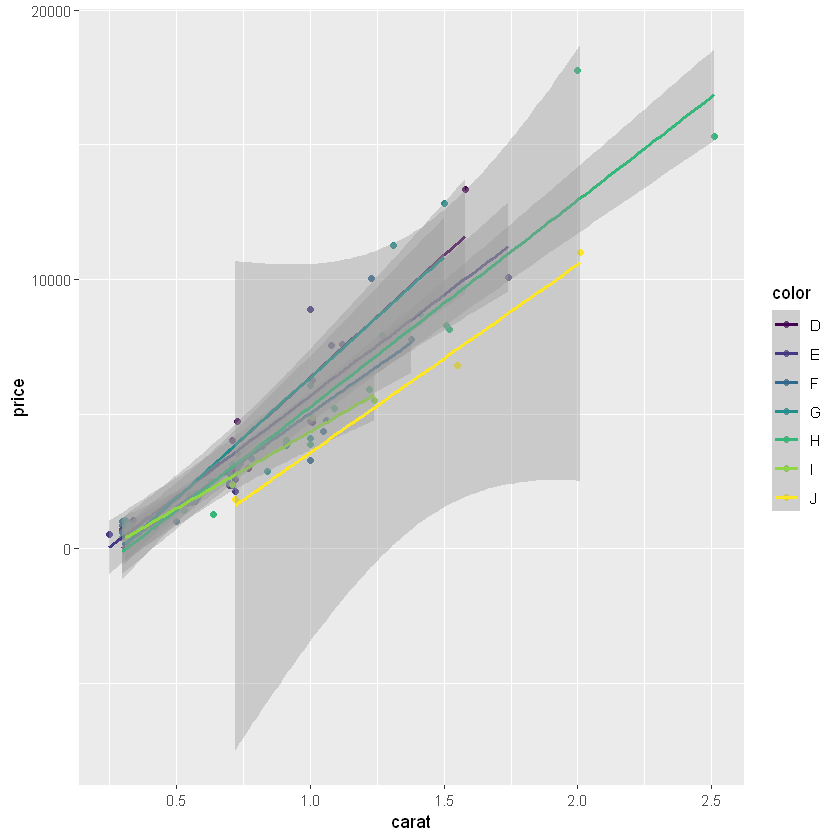

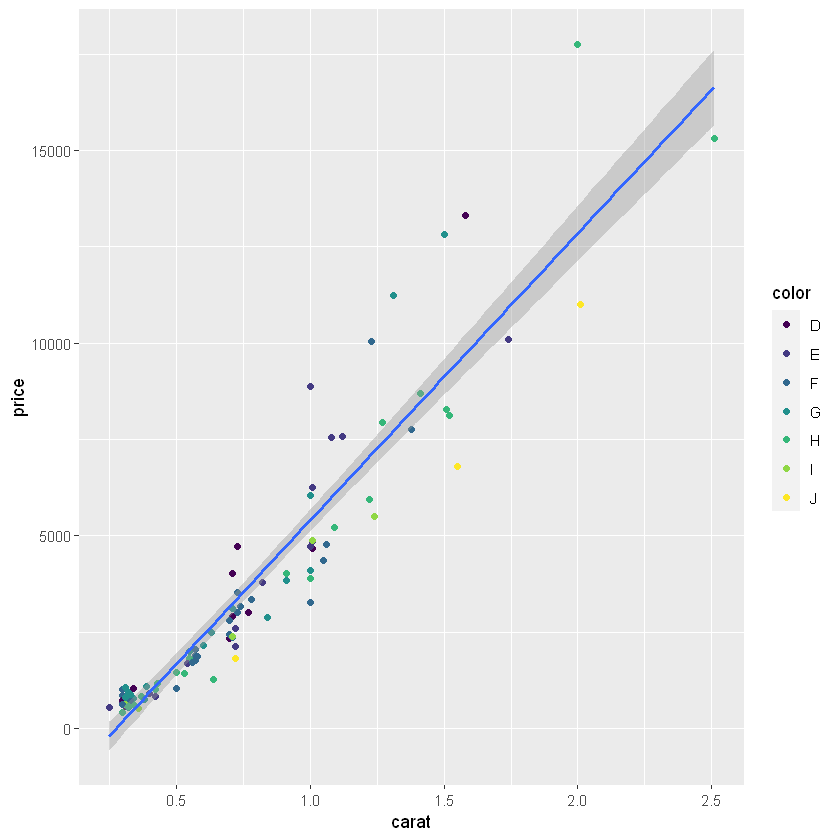

In [9]:
# Step 4: 그래프 그리기
g1 <- ggplot(Sample, aes(x=carat, y=price, colour=color)) + geom_point()
g2 <- ggplot(Sample, aes(x=carat, y=price)) + geom_point(aes(colour=color))

# Step 5: color별 회귀모델
g1 + geom_smooth(method="lm")
g2 + geom_smooth(method="lm")

```ggplot()``` 함수에 colour 인자를 넣으면 회귀모델은 그룹별로 여러 개 표시된다.

하지만 ```geom_point()``` 함수에 넣으면 회귀모델은 하나만 표시된다.

```ggplot()``` 함수에 넣으면 colour 인자가 그 뒤에 있는 함수들에 상속되지만 ```geom_point()``` 함수에 넣으면 그렇지 않기 때문이다.

정확한 값으로 예측구간을 알고 싶다면 ```predict()```함수에 인자 몇 개를 추가한다.

In [27]:
# Step 6: 예측구간 나타내기
Lm <- lm(price ~ carat, data=DF)
predict(Lm, interval="confidence", level=0.95)

,fit,lwr,upr
1,-472.382688,-492.77819,-451.98718
2,-627.511200,-648.33304,-606.68936
3,-472.382688,-492.77819,-451.98718
4,-6.997151,-26.15198,12.15768
5,148.131362,129.37590,166.88683
6,-394.818432,-415.00304,-374.63382
7,-394.818432,-415.00304,-374.63382
8,-239.689919,-259.45752,-219.92232
9,-549.946944,-570.55488,-529.33901
10,-472.382688,-492.77819,-451.98718
